In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# These styles look nicer than default pandas
plt.style.use('ggplot')

# We'll be able to see more text at once
pd.set_option("display.max_colwidth", 100)
print("OK")

OK


Now we load the cats data for our experiment.

In [5]:
# Read in our data
categories = pd.read_csv("../category.csv")

cats = categories[categories['category']=='cat']

cnx = sqlite3.connect("../pets.db")
# Pull product and reviews table
reviews = pd.read_sql_query("select * from reviews", cnx)
products = pd.read_sql_query("select asin, title, description from products", cnx)

cat_reviews = reviews.merge(cats, on="asin", how="inner")
display(cat_reviews.sample(5))

display(products.sample(5))
cnx.close()

,overall,vote,verified,review_time,reviewer_id,asin,reviewer_name,review_text,review_summary,unixReview_time,category_id,category
578826,4,na,1,"03 23, 2016",AM2A41BEH30F0,B001U8T1D8,Paul N,Seems to work and the cat likes it. The next full scale ant invasion will be the true test......,Four Stars,1458691200,1,cat
1289490,5,na,1,"12 11, 2016",A3AB551HAJPXGC,B016KO5BX0,DK,Kitties favorite toys,Great for kitties,1481414400,1,cat
1351736,4,na,0,"09 9, 2017",ASE6JQ2TKO47Z,B01C600NGM,Andrew L,This product isn't bad. I typically use Arm & Hammer's Clump & Seal and this one appears to try ...,"Lightweight kitty litter that clumps waste and is easy to scoop. Locks odor, but not all of it ...",1504915200,1,cat
224803,5,na,1,"03 29, 2016",A3QVIZF5QJVBWI,B000ELUQQS,Amazon Customer,I am never going back to scooping! I have two cats... One who loves to throw cat litter in the g...,Highly recommend if you want your house to smell nice again,1459209600,1,cat
1339983,5,na,1,"09 14, 2017",A3TGQZL2R6DYLD,B01BFOHQEC,Amazon Customer,GREAT PRODUCT!!,Five Stars,1505347200,1,cat


,asin,title,description
67452,B005ER6BLG,NCAA Illinois Fighting Illini Polar Fleece Hooded Dog Jacket,Officially licensed classic hooded dog jacket features an embroidered official team logo; machin...
22413,B000FPJ740,Dingo 2-Pack 4.4-Ounce Wag'N Wraps,"Dingo Wag'N Wraps Chicken Basted 2 Pk (5.25"" X 1"" Dia.), 4.4-Ounce,<div class=""aplus""> <div clas..."
121987,B00HUYFZN6,UrbanPup Footballer Pet Socks (Large - Dog Foot Width: 1.5&quot; / 35mm),"These fun and functional doggie socks protect your dogs paws from mud, snow, ice, hot pavement, ..."
4945,B0002DHZ26,"Petmate Dosckocil DDS21002 Plastic Classic Dog Kennel, Medium, Mouse Gray","Dosckocil Petmate classic dog kennel features heavy duty plastic shells, wire doors and secure s..."
188042,B01AKMTXK0,Bird Night Light for Parrots - Pack of 2,Two Blue LED night light with regular night light chandelier socket base. Two adapters included ...


Next we aggregate the cats data by ASIN so that we have just ASIN and the concatenated review text.

In [13]:
def aggregate_df(df, key, column):
    df = pd.DataFrame(df.groupby([key])[column].apply(lambda x: ' '.join(x)))
    df['asin'] = df.index
    df['idx'] = [x for x in range(len(df))]
    df = df.set_index('idx')
    return df

cat_reviews = cat_reviews[['asin','review_text']]
cats_df = aggregate_df(cat_reviews, 'asin', 'review_text')

cats_df = cats_df.merge(products, on="asin", how="inner")
display(cats_df.head())

cats_df['all_text'] = cats_df.apply(lambda row: "{} {} {}".format(row['title'],
                                                                 row['description'],
                                                                 row['review_text']),
                                                                 axis=1)

# Remove non-word characters, so numbers and ___ etc
cats_df['all_text'] = cats_df['all_text'].str.replace("[^A-Za-z ]", " ")
dataset = cats_df.sample(1000)
display(dataset.sample(5))

,review_text,asin,title,description
0,"Sadly, I gave as a memorial book for a friends dearly departed cat. The cover has a soft microfi...",0983794812,"Pathway Cat Journal, Capture Your Memories, Pet Health and More","Kitty capers, playful antics and quality cuddle time. Capture those special moments in your Path..."
1,My cats love all these DVD's. Especially volume 1 (That is the volume that seems to have more v...,1223000893,"Cat Sitter DVD Trilogy - Vol 1, Vol 2 and Vol 3","This combo pack provides you with all 3 Cat Sitter DVD's. Keep your cats entertained morning, no..."
2,"Amazing product will buy again.\nThank you works for my kitten, nice kitten vitamins great for e...",1300451041,Cat Vitamins Kitten Booster Herbal Supplement,"VetVittles tm Kitten Booster (improved formula of the previous Kitten Health) Boosts strength, i..."
3,Kitten Booster Tuna Flavor Pet Herbal Supplement is very good product and works very well for ou...,1300451092,Cat Vitamins Kitten Booster Pet Herbal Supplement,"VetVittles tm Kitten Booster (improved formula of the previous Kitten Health) Boosts strength, i..."
4,"I don't know if it worked. I'm fostering 3 sick kittens. They all improved, but they continued t...",131218986X,Cat Vitamins Kitten Booster Pet Herbal Supplement,"VetVittles tm Kitten Booster (improved formula of the previous Kitten Health) Boosts strength, i..."


/home/mporter/anaconda3/envs/boxcoxrox/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


,review_text,asin,title,description,all_text
2783,Cute item. Leaks litter everywhere like a sieve. Completely impractical as a litter box. So disa...,B000BPIWQI,Kitty A Go Go Designer Cat Litter Box - Polka Dot,Cat owners with taste and style choose the Kitty A Go Go Designer Cat Litter Box in Polka&nbsp;D...,Kitty A Go Go Designer Cat Litter Box Polka Dot Cat owners with taste and style choose the Kit...
17271,"This tool rocks on so many levels. Even when I expect to miss some hair on my dog, I actually d...",B00K0A9SXK,Deshedding Tool - 2-in-1 Pet Grooming Brush or Tools for Cats and Dogs- Shedding Comb and Sheddi...,<b>The 2-in-1 Pet Hair Comb and DeShedding Tool That Gets It All!<br><br>Picks Up Fur Before It'...,Deshedding Tool in Pet Grooming Brush or Tools for Cats and Dogs Shedding Comb and Sheddi...
9182,Description is deceiving is actually only 3oz per package for a total of 12oz unlike every oth...,B0052UOR16,Weruva Cats in the Kitchen PouchLove Me Tender Box 4PACK (12 oz),"Cats in the Kitchen offers the highest quality, natural food available for cats contained in sin...",Weruva Cats in the Kitchen PouchLove Me Tender Box PACK oz Cats in the Kitchen offers the ...
8353,"I was very excited to get this product, but was horribly disappointed. Love the palm tree and na...",B004G60AEU,"Kitty Palm Cat Tree with Palm Top, Green Carpet, Manila Rope, 2 Platform, 60 Inches",The KP60 is the most popular Kitty Palm cat tree. The two swiveling platforms can be reversed to...,Kitty Palm Cat Tree with Palm Top Green Carpet Manila Rope Platform Inches The KP is ...
14505,They didn't want to stay on the kitten nails very well. Love them,B00DOZMLKU,"Eyourlife 20 pcs Soft Nail Caps For Cat Pet Claw Control Paws off + Adhesive Glue,Size XS,Gold G...",<b>Description</b> \n<br /> \n<br />20 pcs Soft Nail Caps For Cat Pet Claw Control Paws off + Ad...,Eyourlife pcs Soft Nail Caps For Cat Pet Claw Control Paws off Adhesive Glue Size XS Gold G...


The LDA process requires a CountVectorizer as well as a stemmer.  Those are implemented here:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import Stemmer  # From pip module PyStemmer

# English stemmer from pyStemmer
stemmer = Stemmer.Stemmer('en')

analyzer = CountVectorizer().build_analyzer()

# Override TfidfVectorizer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))

print("Ok.")

Ok.


In [16]:

vectorizer = StemmedCountVectorizer(stop_words='english', min_df=5, max_df=0.5)
matrix = vectorizer.fit_transform(dataset['all_text'])

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df.head()

,aa,aafco,abandon,abat,abil,abl,abnorm,abras,absenc,absolut,...,yummi,yup,zani,zero,zinc,zip,ziplock,zipper,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,2,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 7
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: litter box clean work mat scoop smell odor doe make
Topic 1: work door feeder food day feed set dog unit tri
Topic 2: food eat kitten dri treat tri feed can brand flavor
Topic 3: work flea dog day did tri frontlin week vet month
Topic 4: carrier fit size br dog small collar perfect bag look
Topic 5: tree scratch post easi sturdi assembl look price carpet littl
Topic 6: toy play brush feather hair ball kitten kitti littl fur
CPU times: user 12 s, sys: 5.92 s, total: 18 s
Wall time: 4.69 s


In [19]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_litter_box_clean,topic_work_door_feeder,topic_food_eat_kitten,topic_work_flea_dog,topic_carrier_fit_size,topic_tree_scratch_post,topic_toy_play_brush
0,53.798844,1.460363,3.062179,10.669939,29.243953,1.744363,0.020359
1,20.201946,5.214983,1.576098,68.054832,2.543032,2.399515,0.009595


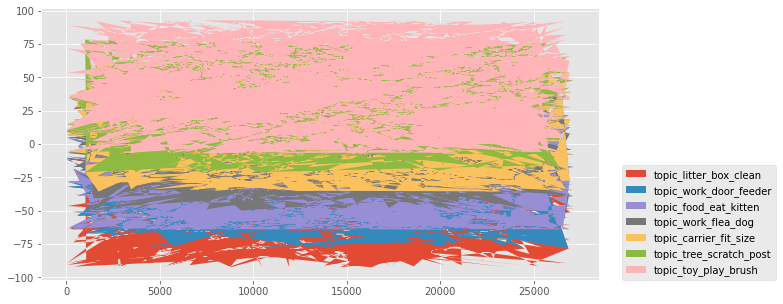

In [21]:
x_axis = dataset.index
y_axis = topics

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [22]:
%%time

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [3, 5, 7, 9, 15],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(matrix)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -1317243.3599813147
CPU times: user 10.2 s, sys: 5.43 s, total: 15.6 s
Wall time: 53.5 s


In [23]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 5 topics
n_topics = 5
model = LatentDirichletAllocation(learning_method='online', n_components=n_topics, learning_decay=0.5)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: litter box clean work scoop brush mat smell doe hair
Topic 1: toy play tree feather kitten littl easi kitti post realli
Topic 2: fit scratch size carrier small bed look dog perfect kitti
Topic 3: food eat kitten treat dri feed bowl tri can brand
Topic 4: work flea day door dog did tri year month feeder
CPU times: user 10.2 s, sys: 4.62 s, total: 14.8 s
Wall time: 4.32 s


In [24]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_litter_box_clean,topic_toy_play_tree,topic_fit_scratch_size,topic_food_eat_kitten,topic_work_flea_day
0,65.136438,0.682623,26.697228,2.100316,5.383395
1,12.074596,0.013773,5.804156,1.946042,80.161432


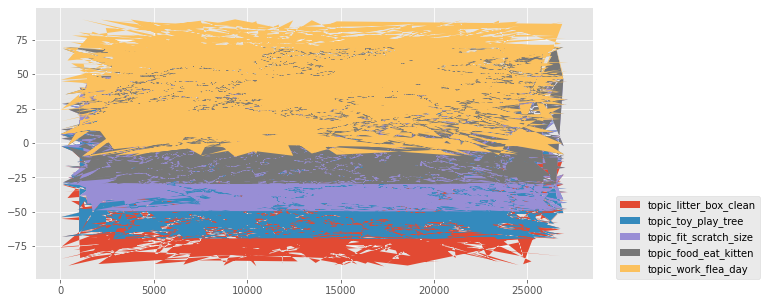

In [29]:
x_axis = dataset.index
y_axis = topics

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [ ]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 15
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}")

    print(f"Topic {topic_idx}: {top_features}")